In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1)

On considère la perte quadratique $\ell(a,b)=(a-b)^2/2$. Calculer $\partial \frac{\ell}{\partial a} (a,b)$

$\partial \frac{\ell}{\partial a} (a,b) = a-b$

# 2)

Implémenter l'algorithme SGD avec le choix d'un pas constant $\gamma$ et d'un nombre d'itérations $T$ permettant de minimiser le critère et d'aboutir à une solution correcte.

In [45]:
def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",
                        alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            gradient = X[idx, :] * (np.dot(X[idx], w) - y[idx]); # QUESTION 2
        elif loss == "hinge":
            gradient = 0.0; # QUESTION 11
            raise NotImplementedError('QUESTION 11')
        w -= gamma_func(t) * gradient
        
        if average is True:
            raise NotImplementedError('QUESTION 9')

        if alpha > 0:
            raise NotImplementedError('QUESTION 6')
        
        
        all_w[t] = w
    return w, all_w, pobj

On dérive la fonction de perte "mse" = $\frac{1}{2}\frac{1}{N}(Y-X \omega)^2$ en fonction d'une observation tirée au hasard $X_1$

# 3)

Prendre comme modèle jouet: $n$ vecteurs $(x_i)_{1 \le i \le n}$ de $\mathbb{R}^n$ tirés de manière i.i.d selon une loi gaussienne, centrée réduite (prendre $n=1000$, $p=100$) ainsi que $n$ réels $(\epsilon_i)_{1 \le i \le n}$ tirés de manière i.i.d selon une loi gaussienne, centrée réduite. On note $\omega=(1,...,1)^T)$ et l'on définit $\forall i \in \{1,...,n\}, y_i=x_i^T \omega^* + \epsilon_i$.

In [4]:
X = np.random.normal(0, 1, 1000)

#### Visulation

On peut afficher les gaussiennes avec un histogrammes directement (qui donne la proportion de chaque valeur tirée)

(array([  2.,  28., 101., 205., 272., 234., 115.,  38.,   4.,   1.]),
 array([-3.18413821, -2.48085673, -1.77757525, -1.07429378, -0.3710123 ,
         0.33226918,  1.03555066,  1.73883213,  2.44211361,  3.14539509,
         3.84867657]),
 <a list of 10 Patch objects>)

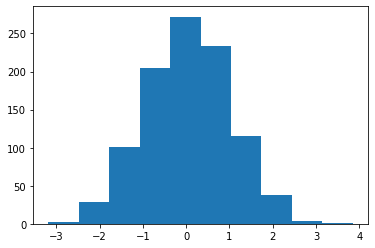

In [27]:
plt.hist(X)

Ou bien on peut afficher la fonction de densité pour 1000 points

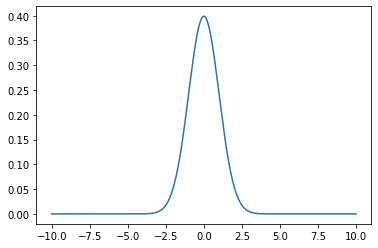

In [25]:
plt.plot(np.linspace(-10,10,1000),(1/np.sqrt(2*np.pi))*np.exp(-(np.linspace(-10,10,1000)**2/2)))

# 4) et 5)

Afficher l'évolution de la valeur de l'objectif en fonction du nombre d'itérations, c'est-à-dire afficher la fonction $t \to \frac{1}{n}\Sigma_{i=1}^n \ell (\widehat{f}_{\omega_t}(x_i),y_i)$

In [50]:
n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations


X_toy = np.random.randn(n_samples, n_features)
epsilon_toy = np.random.randn(n_samples)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target) + epsilon_toy


# Initialize w with just zeros
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'


#### Test sur les valeurs de gamma (step size = learning rate)

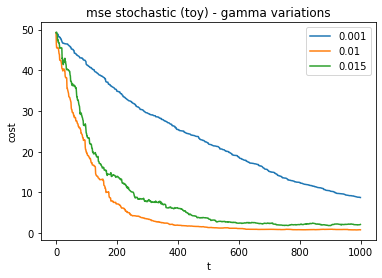

In [82]:
n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations


X_toy = np.random.randn(n_samples, n_features)
epsilon_toy = np.random.randn(n_samples)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target) + epsilon_toy


# Initialize w with just zeros
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'

plt.figure()

for idx, gamma in enumerate([0.001,0.01,0.015]):
    w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, 1000, w_ini,
                                         loss=loss, alpha=0, average=False)

    plt.plot(pobj,label=gamma)
    
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy) - gamma variations' % loss)
plt.legend()
plt.show()

#### Test sur le nombre d'itérations avec le meilleur $\gamma$ ($0.01$)

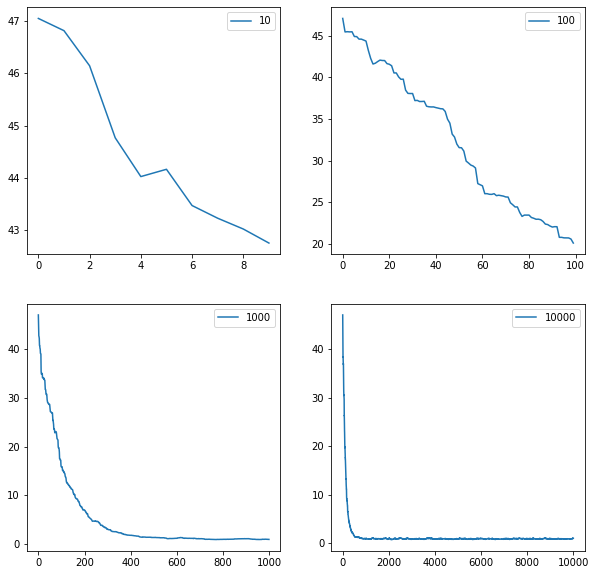

<Figure size 432x288 with 0 Axes>

In [127]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

n_samples = 1000
n_features = 100


X_toy = np.random.randn(n_samples, n_features)
epsilon_toy = np.random.randn(n_samples)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target) + epsilon_toy


# Initialize w with just zeros
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'

plt.figure()
r=0
for idx, n_iter in enumerate([10,100,1000,10000]):
    col=idx
    w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, 0.01, n_iter, w_ini,
                                        loss=loss, alpha=0, average=False)
    if(idx>1):
        r=1
        col=idx-2
    axs[r, col].plot(pobj,label=n_iter)
    axs[r, col].legend()

# 6)

Régulariser la difficulté en optimisant cette fois la fonction objectif $\frac{1}{n}\Sigma_{i=1}^n \ell(\widehat{f}_{\omega}(x_i),y_i) + \frac{\alpha}{2} ||\omega||^2_2$

In [112]:
def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",
                        alpha=0, average=False):
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            gradient = X[idx, :] * (np.dot(X[idx], w) - y[idx]);
        if alpha > 0:
            gradient += alpha * w
        w -= gamma_func(t) * gradient
        
        all_w[t] = w
    return w, all_w, pobj

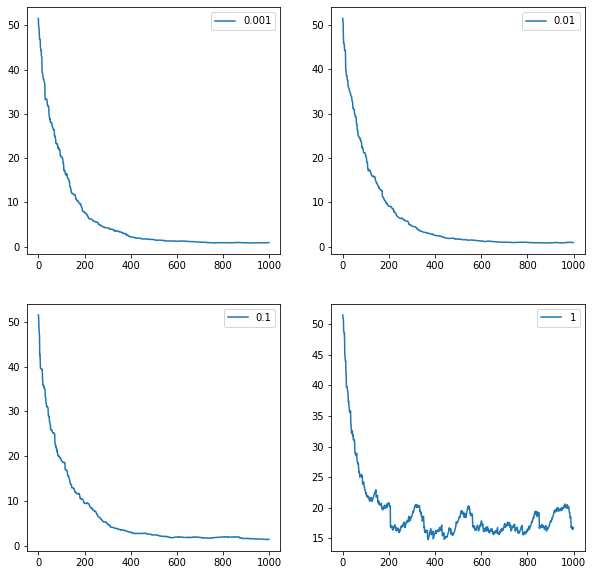

In [131]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

n_samples = 1000
n_features = 100

X_toy = np.random.randn(n_samples, n_features)
epsilon_toy = np.random.randn(n_samples)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target) + epsilon_toy


# Initialize w with just zeros
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'

r=0
for idx, alpha in enumerate([0.001,0.01,0.1,1]):
    col=idx
    w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, 0.01, 1000, w_ini,
                                        loss=loss, alpha=alpha, average=False)
    if(idx>1):
        r=1
        col=idx-2
    axs[r, col].plot(pobj,label=alpha)
    axs[r, col].legend()

On utilise un terme de régularisation dans 2 cas:
- Pour ne pas avoir des poids trop élevés (rajouter alpha revient en fait à minimiser la fonction de perte sous la contrainte que $\omega \le scal*\alpha$)
- Pour éviter le surapprentissage. En fait, ajouter le terme de régularisation permet de ne pas minimiser la "vraie" fonction de perte, donc la minimisation est moins sujet au surapprentissage

Ici la régularisation optimale c'est le plus petit terme possible (qui donne une grande zone commune avec la fonction de perte => le minimum est le minimum global de la fonction).

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSws172KHlCEkT7d_WVhFLTPJoHuxVpyyFrTL-ZFVMtMDIcxob2"></img>

Le carré c'est lorsqu'on utilise la norme 1, la boule pour la norme 2. Un $\alpha$ trop petit donne une grande zone commune entre la fonction (ellipse rouge) et le cercle.

Pour plus de détails sur l'influence de la régularisation sur l'optimisation, voir https://gowerrobert.github.io/pdf/teaching/IASD/SGD-variants_IASD.pdf (slide 20)

# 7)

Peut-on faire diminuer encore plus la fonction objectif avec un pas non-constant $(\gamma_t)_{t=1,...,T}$ qui décroît au cours des itérations? Si oui, quel problème cela pose-t-il en pratique?

In [168]:
def stochastic_gradient(X, y, gamma, n_iter, w_ini, loss="mse",
                        alpha=0, average=False):
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    def gamma_func(t):
        if(gamma=="const"):
            return 0.01
        else:
            return 1./(100+t)

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            gradient = X[idx, :] * (np.dot(X[idx], w) - y[idx]);
        if alpha > 0:
            gradient += alpha * w
        w -= gamma_func(t) * gradient
        
        all_w[t] = w
    return w, all_w, pobj

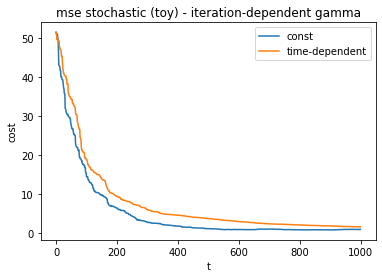

In [174]:
n_samples = 1000
n_features = 100
n_iter = 1000  # number of iterations

X_toy = np.random.randn(n_samples, n_features)
epsilon_toy = np.random.randn(n_samples)
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target) + epsilon_toy

# Initialize w with just zeros
w_ini = np.zeros(X_toy.shape[1] + 1)

loss = 'mse'

plt.figure()

for idx, gamma in enumerate(["const","time-dependent"]):
        w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, 1000, w_ini,
                                         loss=loss, alpha=0, average=False)
        plt.plot(pobj,label=gamma)
    
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy) - iteration-dependent gamma' % loss)
plt.legend()
plt.show()

On remarque qu'utiliser un pas constant donne des résultats sensiblement meilleurs que lorsque le pas est stochastique. Cela est dû aux données qui sont telles que le pas stochastique n'est pas optimal.